## Homework #6

* Due on **Monday, April-3-2020**
* Please comment your code and send it to our TA Ms Hangyu Liu (hangyu@hku.hk) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
%matplotlib inline

### 1. Log-normal distributions (30%)

Many things in nature are not normally distributed.  Many processes lead to distributions in which the log of the quantity is normally distributed instead of the quantity itself.  For example, grain sizes in sedimentary sequences are often log normally distributed.  These distributions are _log-normal_ and behave differently than normal distributions.  

The equation for the log-normal probability density function is this: 

$$P=f(x,\mu, \sigma)= \frac{1}{x\sigma \sqrt{2\pi}} \exp {\bigl(-\frac{(\text{ln}(x)-\text{ln}(\mu))^2}{2\sigma^2}}\bigr),0< x < \infty$$

Notice that $x$ is in the denominator so we can't evaluate the probability when x=0.  So we can't start with x=0. 

- make a **lambda function** to evaluate the probability density of log-normal distributions for a grain size $x$ with and a mean and standard deviation of 10 and 0.1 microns, respectively (choose a proper range for $x$)
- Simulate a grain size distribution that is drawn from a log normal distribution with 100 grains (use the random.lognormal() function). 
- Plot the theoretical and empirical distributions as histograms.
- Calculate the mean, median, standard deviation of the simulated distribution.  
- How many grains do you need to simulate in order to make the empirical distirbution look like the theoretical one?

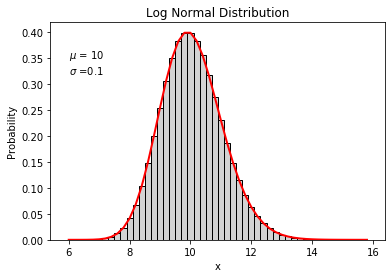

In [11]:
# theoretical
# lambda function for the log-normal distribtion
logNormal = lambda x,mu,sigma : 1./(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-np.log(mu))**2/(2*sigma**2))

mu,sigma,incr=10,0.1,.2 # set the mean,  standard deviation and bin width
xs=np.arange(6,16,incr) # make an array of test values
Probability=logNormal(xs,mu,sigma) # get probabilities 
plt.bar(xs,Probability,width=incr,color='lightgrey', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('x')
plt.ylabel('Probability')
plt.text(6,.35,'$\mu$ = '+str(mu)) # stick on some notes
plt.text(6,.32,'$\sigma$ ='+str(sigma))
plt.title('Log Normal Distribution');

the mean of the simulated distribution is 10.07
the median of the simulated distribution is 10.04
the standard deviation of the simulated distribution is 0.88


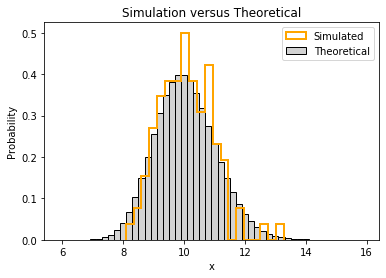

In [52]:
from numpy import random
# Simulate 
mu,sigma=10,0.1 # set the mean,  standard deviation
Nmc=100 # number of monte carlo simultions
# note that the parameter goes into the random.lognormal() function is log(mu) instead of mu
Simulated=random.lognormal(np.log(mu),sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='lightgrey') # make the bar chart
plt.hist(Simulated, bins=20, density=True,histtype='step',color='orange',linewidth=2.,label='Simulated') # plot them
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Simulation versus Theoretical');

# calculate the mean,median and standard deviation
print('the mean of the simulated distribution is',np.round(Simulated.mean(),2))
print('the median of the simulated distribution is',np.round(np.median(Simulated),2))
print('the standard deviation of the simulated distribution is',np.round(Simulated.std(),2))

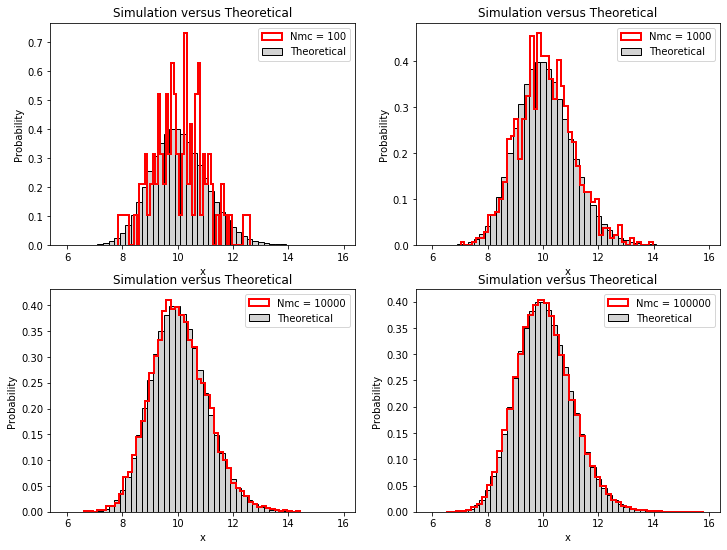

In [67]:
# let's experiment with the # of monte carlo simulations and compare the empirical versus theoretical

Nmc=[100,1000,10000,100000] # number of monte carlo simultions

plt.figure(figsize=(12,9))
k=1 # index for subplot

for n in Nmc:
    
    plt.subplot(2,2,k) # current subplot
    k = k+1 # move to next subplot index
    # plot theoretical distr
    plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='lightgrey') # make the bar chart
    # plot simulated distr
    Simulated=random.lognormal(np.log(mu),sigma,n) # get Nmc  simulated data points from distribution
    plt.hist(Simulated, bins=50, density=True,histtype='step',color='r',linewidth=2.,label='Nmc = '+str(n)) # plot them
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Simulation versus Theoretical');

Seems like when Nmc > 10000k, the simulated distribution follows the theoretical one quite well (just by eyeballing the figures)

### 2. Distributions of GDP and life expectancy (30%)

- Download the data file "gdp_data.txt" from Moodle and load it into Python using Pandas as a data frame
- Print out the head() of your data frame to screen, so you know clearly what column data sets you are working with
- Find out the number of continents in your data set, print out the results (recall in the in-class practice, we used the **.values** property of a column data, or, Series together with the **set()** function, what's a main property of a Python set?)
- Loop through the continents, print out the mean, mode, median and standard deviation of life expectancy for each continent at year 2007
- Which continent(s) has (have) distribution(s) most likely Normal? Why? 
- Make a histogram of the life expectancy in year 2007, divide the data to different subgroups by continents, and compute the skewness of the distributions for each continent
- [**extra credit 10%**] Use the data for all the years (1952-2007) to make a scatter plot showing the relationship between $\Delta$ and $S$, where $\Delta$ = mean - median, and $S=$ skewness of the distributions. 

### 3. Solar wind versus geomagnetic activity  (40%)

Download the data file "OMNI_2003.xls" from Moodle, which is a one-hour solar wind and geomagnetic activity data for the year of 2003. The data file is generated in NASA's cdaweb OMNI data base (https://omniweb.gsfc.nasa.gov/html/ow_data.html), combined from multiple space-based and ground-based measurments. For the interplanetary magnetic field (IMF) components Bx By and Bz:

- X-component pointing from the Earth to the Sun
- Y-component pointing from Dawn to Dusk
- Z-component pointing from the Center of the Earth towards the North Pole

These components basically control the dynamic variation of the space environment. The "KP" index in the data is called the "Planetary-K" index which describe Now let's try some data analysis to learn some space sciences.

- Load the excel file into Python as a Pandas data frame, pay attention to the number of rows you need to skip (use the skiprows = # option)
- Print out all the names of the columns so you know exactly what column data you are working with 
- Create a new column named "AE" (auroral index) by computing (AU - AL), generate a scatter plot to show the relationship between KP and AE. By looking at the plot, what do you think is the relationship between KP and AE?
- What's the maximum value of KP in 2003? What time did the max KP value occur?
- What are the mean, median, max, min values of IMF Bx? 
- Are the above values good enough to describe the Bx component of the interplanetary field? Why?
- Generate a histogram of the interplanetary magnetic field (IMF) Bx, By and Bz, use at least 80 bins
- Test whether the distributions of Bx, By and Bz are Normal or not. Print out the results
- How many modes are there in the Bx data? How many modes are there in the By data? 
- Now divide the Bx data into two groups (By>0 and By<0), and use histograms to show the distribution of Bx for each By-group. 
- [**extra credit 10%**] Do your own research and try to explain either one of the following two phenomena: 
    - what happened during the maximum KP time in 2003; or
    - why there are two modes in Bx and By but not Bz.
    
